fake msg ai using machine learning

train.csv: A full training dataset with the following attributes:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks the article as potentially unreliable

1: fake
0: real

test.csv: A testing training dataset with all the same attributes at train.csv without the label.

In [2]:
# importing the dependencies

import numpy as np
import pandas as pd
import re  # useful for searching words in a text or para
import nltk
from nltk.corpus import stopwords # to remove stopwards like articles etc 
from nltk.stem.porter import PorterStemmer # 
from sklearn.feature_extraction.text import TfidfVectorizer # used to convert text into feature vector
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:
news_dataset = pd.read_csv('news_dataset.csv')
news_dataset.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news_dataset.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
news_dataset[((news_dataset['title'].isnull()) | (news_dataset['text'].isnull()))]['label'].value_counts()

label
1    597
Name: count, dtype: int64

In [6]:
# Fill NaN values in 'title' and 'text' columns with a space in place
news_dataset[['title', 'text']] = news_dataset[['title', 'text']].fillna('')


In [7]:
news_dataset.isnull().sum()

title        0
author    1957
text         0
label        0
dtype: int64

In [8]:
news_dataset[((news_dataset['author'].isnull()) & (news_dataset['title'].isnull()))].sum()

title     0
author    0
text      0
label     0
dtype: object

In [9]:
news_dataset[(news_dataset['author'].isnull() & (news_dataset['label'] == 0))]

,title,author,text,label
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
685,The New York Times to Offer Open Access on Web...,NaN,The New York Times is inviting readers to take...,0
2785,How the Poll Was Conducted - The New York Times,NaN,The latest New York News Poll is based on te...,0
3203,37 Who Saw Murder Didn’t Call the Police - The...,NaN,"For more than half an hour 38 respectable, law...",0
3470,"‘My First Gay Bar’: Rachel Maddow, Andy Cohen ...",NaN,"For generations of gays and lesbians, especial...",0
3675,"2 TV Shows, 4 Books and 7 Viral Videos for You...",NaN,Summer’s almost over. Here’s a cultural diet f...,0
5239,Text of F.B.I. Director’s Remarks on Investiga...,NaN,Following is the prepared text of remarks by D...,0
5608,"As Hurricane Matthew Nears U.S., Residents Get...",NaN,"• Hurricane Matthew, a deadly storm with maxim...",0
5911,Keep Your Family Close and Your Roomba Closer ...,NaN,How lovable can a robot be? A study of Roomba ...,0
7032,Reactions to the Supreme Court Ruling on Texas...,NaN,"In a major abortion ruling Monday, the Supreme...",0


In [10]:
news_dataset[(news_dataset['author'].isnull() & (news_dataset['label'] == 1))]

,title,author,text,label
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
43,Can I have one girlfriend without you bastards...,NaN,Can I have one girlfriend without you bastards...,1
...,...,...,...,...
20718,This Is The Best Picture In Human History | Da...,NaN,This Is The Best Picture In Human History By: ...,1
20728,Trump warns of World War III if Clinton is ele...,NaN,Email Donald Trump warned in an interview Tues...,1
20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1


In [11]:
news_dataset.loc[(news_dataset['author'].isnull() & (news_dataset['label'] == 0)), 'author'] = 'BBC News'

In [12]:
news_dataset.loc[(news_dataset['author'].isnull() & (news_dataset['label'] == 1)), 'author'] = 'Anonymous'

In [13]:
news_dataset.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

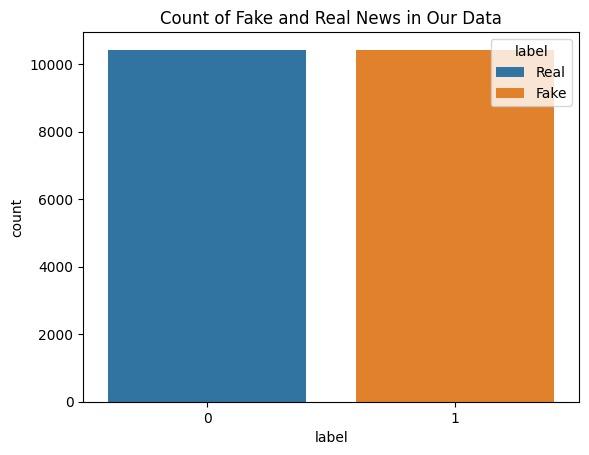

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

label = news_dataset['label'].map({
    0: 'Real', 1 : 'Fake'
})

plt.title('Count of Fake and Real News in Our Data')
sns.countplot(x='label', data=news_dataset, hue = label)
plt.show()

In [15]:
news_dataset['label'].value_counts()

label
0    10426
1    10413
Name: count, dtype: int64

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# merging title and author together on which we will do prediction we are not using text because it is very large
news_dataset['main-content'] = news_dataset['author'] + ' ' + news_dataset['title']
news_dataset['main-content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20834    BBC News Pakistan Hosts International Climate ...
20835    Hamid Mir Prime Minister's Economic Policy Cri...
20836    Dawn News Imran Khan Urges Unity Amid Politica...
20837    Geo News Government Implements Price Control M...
20838    BBC News Pakistan Announces Technological Adva...
Name: main-content, Length: 20839, dtype: object

In [19]:
news_dataset['main-content'].isnull().sum()

0

Now Applying Stemming

Stemming is the process of reducing words to its Root word. For Example: programmers to program

In [20]:
stem_proc = PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-z A-z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()

    # applying stemming to each word which is not stopwords after removing numbers and other characters

    stemmed_content = [stem_proc.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    


In [22]:
news_dataset['main-content'] = news_dataset['main-content'].apply(stemming)

In [23]:
news_dataset['main-content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20834          bbc news pakistan host intern climat summit
20835          hamid mir prime minist econom polici critic
20836    dawn news imran khan urg uniti amid polit turmoil
20837       geo news govern implement price control measur
20838      bbc news pakistan announc technolog advanc educ
Name: main-content, Length: 20839, dtype: object

In [24]:
X = news_dataset['main-content'].values
Y = news_dataset['label'].values


Converting Textual data to numerical data as Machine does not understand textual data by using tfidfVectorizer() method

In [25]:
vectorizer = TfidfVectorizer()

vectorizer.fit(X)

X_transform = vectorizer.transform(X)

In [26]:
print(X_transform)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 212910 stored elements and shape (20839, 17143)>
  Coords	Values
  (0, 268)	0.2701290854265279
  (0, 2485)	0.36766107636871026
  (0, 2962)	0.24687731327652362
  (0, 3603)	0.3599045159194492
  (0, 3795)	0.27056100079818635
  (0, 4979)	0.23335186447081524
  (0, 7012)	0.21877938664245866
  (0, 7698)	0.24788430226920946
  (0, 8636)	0.29214874833410864
  (0, 8915)	0.36360626692060066
  (0, 13482)	0.2563084236488504
  (0, 15699)	0.28487563966340823
  (1, 1498)	0.29399452879087495
  (1, 1895)	0.15526681873147075
  (1, 2224)	0.3827107416793321
  (1, 2816)	0.1909820804822492
  (1, 3571)	0.26375215200979996
  (1, 5510)	0.7143027087230412
  (1, 6823)	0.1905025038571542
  (1, 16814)	0.30072080710394405
  (2, 2946)	0.3180176473082873
  (2, 3106)	0.46096021090587513
  (2, 5396)	0.38666105985847443
  (2, 5975)	0.3474813082267823
  (2, 9625)	0.49349031038428615
  :	:
  (20835, 11608)	0.31637385582920285
  (20835, 11831)	0.381793372291478
  

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size= 0.20, stratify= Y, random_state= 2)

In [28]:
X_train.shape, X_test.shape

((16671, 17143), (4168, 17143))

In [29]:
tree = DecisionTreeClassifier(criterion= 'gini')

In [30]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
Y_predict = tree.predict(X_test)
print("Decision Tree Accuracy: ",{accuracy_score(Y_test, Y_predict) * 100{.2f}})

Decision Tree Accuracy:  0.9925623800383877


In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [33]:
log.fit(X_train, Y_train)

LogisticRegression()

In [34]:
Y_predict = log.predict(X_test)
print("Logistic Regression Accuracy: ",accuracy_score(Y_test, Y_predict))

Logistic Regression Accuracy:  0.9820057581573897


In [35]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

In [36]:
svm.fit(X_train, Y_train)

LinearSVC()

In [37]:
Y_predict = svm.predict(X_test)
print("SVM Accuracy: ",accuracy_score(Y_test, Y_predict))

SVM Accuracy:  0.9930422264875239


In [38]:
from xgboost import XGBClassifier
xgbModel = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [39]:
xgbModel.fit(X_train, Y_train)

c:\Users\msale\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [40]:
Y_predict = xgbModel.predict(X_test)
print("XGB Accuracy: ",accuracy_score(Y_test, Y_predict))

XGB Accuracy:  0.9882437619961613


Evaluating on Real Data


In [41]:
data = [{
      "title": "Scientists Successfully Clone Extinct Dinosaurs in Secret Lab",
      "author": "John Doe",
      "text": "In an astonishing breakthrough, a group of scientists has allegedly cloned several species of dinosaurs in a top-secret facility. According to leaked documents, these creatures will be used for research and potential commercial purposes. Government sources have neither confirmed nor denied these claims.",
      "label": 1
    },
{
      "title": "UN Climate Report Warns of Irreversible Global Warming by 2040",
      "author": "Dr. Rebecca Lang",
      "text": "The United Nations has released its latest climate report, warning that if significant action is not taken by 2040, the effects of global warming may become irreversible. The report highlights the need for immediate reductions in carbon emissions to prevent catastrophic environmental damage.",
      "label": 0
    },
{
      "title": "NASA Confirms Alien Life Discovered on Mars",
      "author": "Anonymous",
      "text": "In a shocking discovery, NASA scientists have allegedly uncovered microbial life on Mars. This information was leaked from an internal source within NASA, though the space agency has not made an official announcement. Some experts are skeptical of these claims, citing a lack of scientific evidence.",
      "label": 1
    },
{
      "title": "WHO Approves New Malaria Vaccine for Widespread Use in Africa",
      "author": "Dr. Linda Robertson",
      "text": "The World Health Organization has approved a new malaria vaccine for use across several African countries, marking a significant step in the fight against one of the continent's deadliest diseases. The vaccine, which has been in development for over a decade, is expected to save thousands of lives annually.",
      "label": 0
    },
{
      "title": "Crypto Startup Promises 1000% Returns to Investors Within a Year",
      "author": "Sarah White",
      "text": "A new cryptocurrency startup is promising its investors returns of up to 1000% within just 12 months. The company claims that its proprietary blockchain technology will revolutionize the financial industry. However, some analysts are warning that the company's promises are unrealistic and could be a scam.",
      "label": 1
    },
{
      "title": "FDA Approves First Pill for Postpartum Depression Treatment",
      "author": "Jane Roberts",
      "text": "The U.S. Food and Drug Administration has approved the first-ever oral medication specifically for the treatment of postpartum depression. The drug, known as zuranolone, provides a more accessible treatment option for new mothers struggling with severe depressive episodes. Clinical trials have shown significant improvement in mood within just two weeks.",
      "label": 1
    },
{
      "title": "SpaceX Successfully Launches and Returns Starship Test Flight",
      "author": "Eric Berger",
      "text": "SpaceX successfully completed a test flight of its Starship spacecraft, designed to take humans to Mars. The mission marked a significant milestone for the private space company, with the rocket launching from Texas and landing back on Earth after a brief orbital flight. Elon Musk expressed confidence that Starship will be ready for crewed missions by the end of the decade.",
      "label": 0
    },
{
      "title": "Cure for Cancer Found in Amazon Rainforest",
      "author": "Anonymous",
      "text": "Researchers have discovered a plant in the Amazon rainforest that can cure all forms of cancer. Pharmaceutical companies are reportedly trying to hide this information to protect their profits.",
      "label": 1
    },
{
      "title": "European Union Imposes New Sanctions on Russia Over Ukraine Conflict",
      "author": "Helen Cooper",
      "text": "The European Union has imposed a fresh round of sanctions on Russia in response to the ongoing conflict in Ukraine. The new sanctions target key sectors of the Russian economy, including energy exports and banking services. EU leaders reiterated their support for Ukraine's sovereignty and called for an immediate ceasefire.",
      "label": 0
    }
]

In [42]:
real_df = pd.DataFrame(data)

In [43]:
X = real_df.drop(columns='label',axis=1)

In [44]:
def predictNews(dataframe,model):
    dataframe['main-content'] = dataframe['author'] + ' ' + dataframe['title']
    dataframe['main-content'] = dataframe['main-content'].apply(stemming)
    vectorizedContent = vectorizer.transform(dataframe['main-content'].values)
    print(vectorizedContent)
    prediction = model.predict(vectorizedContent)
    print(prediction)

In [45]:
predictNews(X,svm)
real_df['label']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 75 stored elements and shape (9, 17143)>
  Coords	Values
  (0, 2824)	0.41268146669525574
  (0, 4056)	0.41268146669525574
  (0, 4224)	0.38477828291060096
  (0, 5090)	0.34789228032886027
  (0, 7830)	0.18867733026703407
  (0, 8371)	0.35687509912594617
  (0, 13389)	0.2750981965713791
  (0, 13472)	0.2513631240835781
  (0, 14698)	0.29746132377458656
  (1, 2809)	0.2851764354049044
  (1, 4325)	0.2602646843580618
  (1, 6073)	0.2689687324530373
  (1, 7578)	0.449629493773251
  (1, 8436)	0.43184581472137673
  (1, 12334)	0.3121068766847864
  (1, 12584)	0.21542003858967051
  (1, 15781)	0.26456210009323927
  (1, 16472)	0.33388057330916493
  (1, 16477)	0.2542620475538731
  (2, 369)	0.3723447099038892
  (2, 582)	0.19293592168823223
  (2, 3057)	0.3741810998735433
  (2, 4105)	0.41989735369217074
  (2, 8691)	0.3315272240815787
  (2, 9168)	0.44709951392909253
  :	:
  (5, 12848)	0.25753699221832016
  (5, 15518)	0.395862892475038
  (6, 1424)	0.449

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    0
Name: label, dtype: int64

In [46]:
title = 'Former Pakistani prime minister Imran Khan has been sentenced to 10 years in jail in a case in which he was charged with leaking state secrets.'
author = 'BBC NEWS' 
text = """Khan, who was ousted by his opponents as PM in 2022, is already serving a three-year jail term after being convicted of corruption.

He has called all the charges against him politically motivated.

The conviction under the secrets act comes the week before general elections in which he is barred from standing.

The former international cricketer urged the public to "take revenge for every injustice with your vote on February 8 while remaining peaceful" in a statement released on his X (formerly Twitter) account."""

In [47]:
data = {
        'title' : [title],
        'author': [author],
        'text' : [text]
    }

dataframe = pd.DataFrame(data)

dataframe['main-content'] = dataframe['author'] + ' ' + dataframe['title']
dataframe['main-content'] = dataframe['main-content'].apply(stemming)
vectorizedContent = vectorizer.transform(dataframe['main-content'].values)
print(vectorizedContent)
prediction = svm.predict(vectorizedContent)
print(prediction)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (1, 17143)>
  Coords	Values
  (0, 1297)	0.2570718999930773
  (0, 2355)	0.2161577425209798
  (0, 2528)	0.2263613620389546
  (0, 5584)	0.2373655424175012
  (0, 7287)	0.32905946943527903
  (0, 7664)	0.2645522623045114
  (0, 8113)	0.2921626804323026
  (0, 8535)	0.22860787741911795
  (0, 9685)	0.2541083246116435
  (0, 10321)	0.16193602208580274
  (0, 10989)	0.31522641584130395
  (0, 11831)	0.27587921961339706
  (0, 13472)	0.23489211016908523
  (0, 13547)	0.27111107987411565
  (0, 14453)	0.1813165073276871
  (0, 16962)	0.1894645730359782
[0]


In [48]:
news_dataset

,title,author,text,label,main-content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...
...,...,...,...,...,...
20834,Pakistan Hosts International Climate Summit,BBC News,Pakistan hosted a major summit on climate issu...,0,bbc news pakistan host intern climat summit
20835,Prime Minister's Economic Policy Criticized,Hamid Mir,Economic policies of the Prime Minister faced ...,0,hamid mir prime minist econom polici critic
20836,Imran Khan Urges Unity Amid Political Turmoil,Dawn News,Imran Khan urged political leaders to work tog...,0,dawn news imran khan urg uniti amid polit turmoil
20837,Government Implements Price Control Measures,Geo News,Price control measures were introduced to mana...,0,geo news govern implement price control measur


In [49]:
import pickle

In [50]:
pickle.dump(svm,open('fake-msg.pkl','wb'))

In [51]:
pickle.dump(vectorizer,open('vect-form.pkl','wb'))